In [13]:
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup as bs


In [2]:
%matplotlib inline

In [19]:
def get_player_stats(player_id, team = 'UNK'):
    if team == 'UNK':
        team_short_hand = ['ARC','ATL','CHA','CHR','RED','WHP']
        team_found = False
        num_of_teams = len(team_short_hand)
        team_index = 0
        while team_found == False:
            try:
                url = "https://dn0a11v09sa0t.cloudfront.net/Teams/{}/{}.json".format(team_short_hand[team_index],str(player_id))
                req = requests.get(url)
                req = req.json()
                team_found = True
            except:
                if team_index <= num_of_teams:
                    team_index += 1
                else:
                    req = 'ERR_GET_PLAYER_STATS_NOT_EXPLICIT_TEAM'
                    team_found = True
                    break
    else:
        team_short_hand = team
        try:
            url = "https://dn0a11v09sa0t.cloudfront.net/Teams/{}/{}.json".format(team_short_hand,str(player_id))
            req = requests.get(url)
            req = req.json()
            team_found = True
        except:
            print('Player and team combo not found, try running request without explicity team choice')
            req = 'ERR_GET_PLAYER_STATS_EXPLICITY_TEAM'
    return(req)

In [4]:
players = get_all_players()

In [10]:
players.keys()

dict_keys(['000201', '000202', '000203', '000383', '000204', '000380', '000205', '000206', '000207', '000208', '000209', '000210', '000211', '000212', '000213', '000320', '000215', '000216', '000217', '000218', '000219', '000243', '000220', '000221', '000223', '000222', '000224', '000225', '000226', '000227', '000228', '000229', '000376', '000230', '000231', '000232', '000233', '000234', '000241', '000235', '000236', '000237', '000238', '000239', '000240', '000242', '000375', '000244', '000245', '000246', '000363', '000248', '000249', '000251', '000250', '000252', '000253', '000254', '000255', '000256', '000257', '000258', '000259', '000260', '000261', '000262', '000263', '000264', '000265', '000266', '000364', '000379', '000365', '000362', '000267', '000268', '000269', '000270', '000271', '000377', '000272', '000273', '000274', '000275', '000276', '000384', '000277', '000278', '000279', '000280', '000281', '000282', '000283', '000284', '000286', '000287', '000368', '000288', '000366',

In [13]:
len(players)

182

In [14]:
players['000201']

{'playerId': '000201',
 'firstName': 'Adam',
 'lastName': 'Ghitelman',
 'team': 'Archers',
 'dateOfBirth': '1989-04-25T00:00:00.000Z',
 'position': 'Goalie',
 'height': '5’9',
 'weight': 180,
 'hometown': 'Cold Spring Harbor, NY',
 'highSchool': 'Cold Spring Harbor High School',
 'college': 'Virginia',
 'twitterHandle': 'adam8taylor',
 'instagramHandle': 'adam8taylor'}

In [90]:
player_df = pd.DataFrame.from_dict(players).transpose()

In [60]:
player_id_list

array([['Virginia', '1989-04-25T00:00:00.000Z', 'Adam', ..., 'Archers',
        'adam8taylor', 180],
       ['Princeton', '1996-12-29T00:00:00.000Z', 'Austin', ...,
        'Archers', 'Austinsims18', 200],
       ['Drexel', '1991-05-28T00:00:00.000Z', 'Ben', ..., 'Archers',
        'BenMc90', 205],
       ...,
       ['Maryland', '1995-08-23T00:00:00.000Z', 'Tim', ..., 'Whipsnakes',
        'timmuller36', 215],
       ['Maryland', '1995-09-27T00:00:00.000Z', 'Tim', ..., 'Whipsnakes',
        'timrotanz', 210],
       ['Yale', '1996-04-18T00:00:00.000Z', 'Tyler', ..., 'Whipsnakes',
        '_tywarner5', 205]], dtype=object)

In [5]:
player_df = pd.DataFrame.from_dict(players).transpose()
player_df['stats'] = ""
i = 0
no_stats_list = []
for i in range(len(player_df)-1):
    if i % 10 == 0: print("{} out of {}".format(i,len(player_df)-1))
    id = str(id)
    id = player_df['playerId'][i]
    #print(id)
    s = get_player_stats(id)
    if s != 'ERR_GET_PLAYER_STATS':    
        player_df['stats'][i] = [s]
    else:
        no_stats_list.append(id)
    

0 out of 181
10 out of 181
20 out of 181
30 out of 181
40 out of 181
50 out of 181
60 out of 181
70 out of 181
80 out of 181
90 out of 181
100 out of 181
110 out of 181
120 out of 181
130 out of 181
140 out of 181
150 out of 181
160 out of 181
170 out of 181
180 out of 181


In [6]:
len(no_stats_list)

0

In [121]:
player_df_clean_stats = player_df.drop(no_stats_list, axis=0)


In [22]:
player_df.statistics()

AttributeError: 'DataFrame' object has no attribute 'statistics'

In [4]:
get_player_stats('000347')

{'timestamp': '9/10/2019 9:21:30 PM',
 'playerId': '000347',
 'TeamId': 'WHP',
 'Jersey': '21',
 'FirstName': 'Jeff',
 'LastName': 'Reynolds',
 'Position': 'Midfield',
 'GamesPlayed': '1',
 'Goals': '0',
 'Assists': '0',
 'Points': '0',
 'TwoPointers': '0',
 'Shots': '0',
 'ShotsOnGoal': '0',
 'ShotPercentage': '0.0',
 'GroundBalls': '1',
 'Turnovers': '0',
 'CauseTurnovers': '0',
 'FaceoffsWon': '0',
 'Faceoffs': '0',
 'FaceoffsPercentage': '0.0',
 'FaceoffsWon_Lost': '0-0',
 'Saves': '0',
 'SavePercentage': '0.0',
 'TwoPointShots': 0,
 'TwoPointGoals': 0,
 'OnePointShots': 0,
 'OnePointGoals': 0,
 'OnePointShotPercentage': '0.0',
 'TwoPointShotPercentage': '0.0',
 'GoalsAgainst': 0,
 'GAA': '0.0'}

In [40]:
college_unique = player_df['college'].unique()
college_count = {}
for c in college_unique:
    college_count[c] = 0
i = 0
for i in range(len(player_df)):
    cl = player_df['college'][i]
    college_count[cl] += 1

([<matplotlib.axis.XTick at 0x2075058b400>,
 <a list of 53 Text xticklabel objects>)

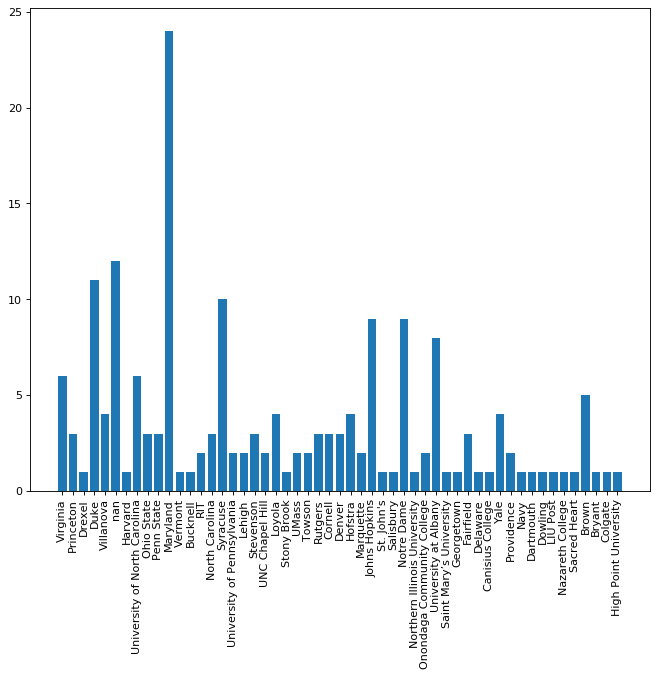

In [54]:
import matplotlib.pyplot as plt

D = college_count


plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()),rotation=90)




In [56]:
player_df.to_csv('output.csv',encoding='utf-8-sig')

In [57]:
test_import = pd.read_csv('output.csv')

In [63]:
test_import


,Unnamed: 0,college,dateOfBirth,firstName,height,highSchool,hometown,instagramHandle,lastName,playerId,position,team,twitterHandle,weight,stats
0,201,Virginia,1989-04-25T00:00:00.000Z,Adam,5’9,Cold Spring Harbor High School,"Cold Spring Harbor, NY",adam8taylor,Ghitelman,201,Goalie,Archers,adam8taylor,180.0,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."
1,202,Princeton,1996-12-29T00:00:00.000Z,Austin,6’1,Fairfield Prep,"Fairfield, CT",Austinsims18,Sims,202,Midfield,Archers,Austinsims18,200.0,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."
2,203,Drexel,1991-05-28T00:00:00.000Z,Ben,5’11,Western Reserve Academy,"Coquitlam, British Columbia, Canada",benmc10,McIntosh,203,Midfield,Archers,BenMc90,205.0,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."
3,383,Duke,1991-12-27T00:00:00.000Z,Brendan,6’0,Chaminade,"Wantagh, NY",BRabbit_3,Fowler,383,Faceoff,Archers,BRabbit_3,195.0,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."
4,204,Villanova,1996-05-26T00:00:00.000Z,Christian,6’0,Mountain Lakes HS,"Mountain Lakes, NJ",christian_cuccinello30,Cuccinello,204,Attack,Archers,Cucci_Mane30,210.0,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."
5,380,NaN,NaN,Curtis,NaN,NaN,NaN,NaN,Corley,380,Defense,Archers,NaN,NaN,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."
6,205,Harvard,1992-09-18T00:00:00.000Z,Danny,5’10,Westhill,"Syracuse, NY",goodmoneysniper,Eipp,205,Midfield,Archers,goodmoneysniper,185.0,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."
7,206,University of North Carolina,1990-09-08T00:00:00.000Z,Davey,5’11,Gilman School,"Baltimore, MD",davey_emala,Emala,206,Attack,Archers,DaveyEmala_0,185.0,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."
8,207,Ohio State,1991-07-14T00:00:00.000Z,Dominique,6’2,Baldwin High School,"Baldwin, NY",dalexander_23,Alexander,207,Midfield,Archers,Mr_Alexander23,225.0,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."
9,208,Penn State,1986-08-19T00:00:00.000Z,Drew,6’2,Springfield HS,"Springfield, PA",DrewAdams14,Adams,208,Goalie,Archers,Drewadams514,185.0,"[{'timestamp': '9/10/2019 9:21:30 PM', 'player..."


In [22]:
get_player_stats('000201')

Trying ARC


{'timestamp': '9/10/2019 9:21:30 PM',
 'playerId': '000201',
 'TeamId': 'ARC',
 'Jersey': '8',
 'FirstName': 'Adam',
 'LastName': 'Ghitelman',
 'Position': 'G',
 'GamesPlayed': '9',
 'Goals': '0',
 'Assists': '0',
 'Points': '0',
 'TwoPointers': '0',
 'Shots': '2',
 'ShotsOnGoal': '2',
 'ShotPercentage': '0.0',
 'GroundBalls': '11',
 'Turnovers': '3',
 'CauseTurnovers': '1',
 'FaceoffsWon': '0',
 'Faceoffs': '0',
 'FaceoffsPercentage': '0.0',
 'FaceoffsWon_Lost': '0-0',
 'Saves': '79',
 'SavePercentage': '51.2',
 'TwoPointShots': 2,
 'TwoPointGoals': 0,
 'OnePointShots': 0,
 'OnePointGoals': 0,
 'OnePointShotPercentage': '0.0',
 'TwoPointShotPercentage': '0.0',
 'GoalsAgainst': 79,
 'GAA': '12.1'}

In [14]:
a = requests.get('https://dn0a11v09sa0t.cloudfront.net/Teams/ARC/000201.json')

In [16]:
a.json()

{'timestamp': '9/10/2019 9:21:30 PM',
 'playerId': '000201',
 'TeamId': 'ARC',
 'Jersey': '8',
 'FirstName': 'Adam',
 'LastName': 'Ghitelman',
 'Position': 'G',
 'GamesPlayed': '9',
 'Goals': '0',
 'Assists': '0',
 'Points': '0',
 'TwoPointers': '0',
 'Shots': '2',
 'ShotsOnGoal': '2',
 'ShotPercentage': '0.0',
 'GroundBalls': '11',
 'Turnovers': '3',
 'CauseTurnovers': '1',
 'FaceoffsWon': '0',
 'Faceoffs': '0',
 'FaceoffsPercentage': '0.0',
 'FaceoffsWon_Lost': '0-0',
 'Saves': '79',
 'SavePercentage': '51.2',
 'TwoPointShots': 2,
 'TwoPointGoals': 0,
 'OnePointShots': 0,
 'OnePointGoals': 0,
 'OnePointShotPercentage': '0.0',
 'TwoPointShotPercentage': '0.0',
 'GoalsAgainst': 79,
 'GAA': '12.1'}